In [ ]:
from google.colab import files
uploaded = files.upload()

Saving acc_gyr.csv to acc_gyr.csv


In [ ]:
import pandas as pd
import numpy as np
import io

df = pd.read_csv(io.BytesIO(uploaded['acc_gyr.csv']))
df.head()

,xAcc,yAcc,zAcc,xGyro,yGyro,zGyro,label
0,6.99,-0.57,-7.28,-2.75,-3.23,2.62,fall
1,6.51,-0.75,-6.93,-0.67,-6.35,4.64,fall
2,6.22,-0.63,-6.73,0.79,-5.49,3.85,fall
3,6.34,-0.62,-6.80,1.59,-2.26,0.67,fall
4,6.49,-0.39,-6.60,0.67,-0.24,-1.10,fall


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96800 entries, 0 to 96799
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   xAcc    96800 non-null  float64
 1   yAcc    96800 non-null  float64
 2   zAcc    96800 non-null  float64
 3   xGyro   96800 non-null  float64
 4   yGyro   96800 non-null  float64
 5   zGyro   96800 non-null  float64
 6   label   96800 non-null  object 
dtypes: float64(6), object(1)
memory usage: 5.2+ MB


In [ ]:
from scipy.stats import skew
from scipy.stats import kurtosis

df['accSkewness'] = df[['xAcc', 'yAcc', 'zAcc']].apply(skew, axis=1)
df['gyroSkewness'] = df[['xAcc', 'yAcc', 'zAcc']].apply(skew, axis=1)
df['accKurtosis'] = df[['xAcc', 'yAcc', 'zAcc']].apply(kurtosis, axis=1)
df['gyroKurtosis'] = df[['xAcc', 'yAcc', 'zAcc']].apply(kurtosis, axis=1)

df.head()

,xAcc,yAcc,zAcc,xGyro,yGyro,zGyro,label,accSkewness,gyroSkewness,accKurtosis,gyroKurtosis
0,6.99,-0.57,-7.28,-2.75,-3.23,2.62,fall,0.072795,0.072795,-1.5,-1.5
1,6.51,-0.75,-6.93,-0.67,-6.35,4.64,fall,0.098030,0.098030,-1.5,-1.5
2,6.22,-0.63,-6.73,0.79,-5.49,3.85,fall,0.070786,0.070786,-1.5,-1.5
3,6.34,-0.62,-6.80,1.59,-2.26,0.67,fall,0.072545,0.072545,-1.5,-1.5
4,6.49,-0.39,-6.60,0.67,-0.24,-1.10,fall,0.062587,0.062587,-1.5,-1.5


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Load the dataset from a CSV file
file_path = '/content/acc_gyr.csv'  # Replace 'path_to_your_dataset.csv' with your file path
data = pd.read_csv(file_path)

# Separate features (x) and labels (y)
x = data.drop('label', axis=1).values
y = data['label'].values

# Encoding categorical labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create the ANN model
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))  # Adding more dense layers
model.add(Dense(8, activation='relu'))   # Adding more dense layers
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
model.fit(x_train, y_train, epochs=50, batch_size=8, validation_data=(x_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/50
9680/9680 [==============================] - 47s 5ms/step - loss: -225549090816.0000 - accuracy: 0.0417 - val_loss: -1115011940352.0000 - val_accuracy: 0.0412
Epoch 2/50
9680/9680 [==============================] - 40s 4ms/step - loss: -6525015293952.0000 - accuracy: 0.0414 - val_loss: -17066175234048.0000 - val_accuracy: 0.0412
Epoch 3/50
9680/9680 [==============================] - 39s 4ms/step - loss: -45672095023104.0000 - accuracy: 0.0414 - val_loss: -90239469092864.0000 - val_accuracy: 0.0412
Epoch 4/50
9680/9680 [==============================] - 39s 4ms/step - loss: -178196213399552.0000 - accuracy: 0.0414 - val_loss: -303772165210112.0000 - val_accuracy: 0.0412
Epoch 5/50
9680/9680 [==============================] - 39s 4ms/step - loss: -511046146064384.0000 - accuracy: 0.0414 - val_loss: -791336651325440.0000 - val_accuracy: 0.0412
Epoch 6/50
9680/9680 [==============================] - 39s 4ms/step - loss: -1207995656568832.0000 - accuracy: 0.0414 - val_loss: -175

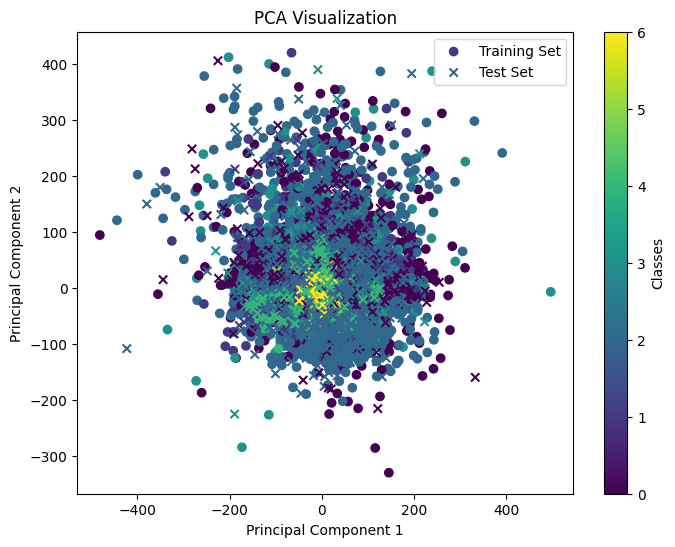

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset from a CSV file
file_path = '/content/acc_gyr.csv'  # Replace 'path_to_your_dataset.csv' with your file path
data = pd.read_csv(file_path)

# Separate features (x) and labels (y)
x = data.drop('label', axis=1).values
y = data['label'].values

# Encoding categorical labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Plotting PCA-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='viridis', label='Training Set')
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_test, cmap='viridis', marker='x', label='Test Set')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(label='Classes')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset from a CSV file
file_path = '/content/acc_gyr.csv'  # Replace 'path_to_your_dataset.csv' with your file path
data = pd.read_csv(file_path)

# Separate features (x) and labels (y)
x = data.drop('label', axis=1).values
y = data['label'].values

# Encoding categorical labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create SVM classifier
svm = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can adjust kernel, C, and gamma parameters

# Train the SVM classifier
svm.fit(x_train, y_train)

# Predict labels for test set
y_pred = svm.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 54.77%

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.49      0.53      3640
           1       0.22      0.00      0.00       797
           2       0.48      0.67      0.56      5500
           3       0.33      0.00      0.00      1123
           4       0.65      0.62      0.63      3285
           5       0.83      0.02      0.04      1181
           6       0.56      0.80      0.66      3834

    accuracy                           0.55     19360
   macro avg       0.52      0.37      0.35     19360
weighted avg       0.55      0.55      0.50     19360


Confusion Matrix:
[[1766    1 1263    0  147    0  463]
 [ 387    2  262    1   96    0   49]
 [ 238    6 3695    1  600    4  956]
 [ 694    0  297    1   90    0   41]
 [   1    0 1010    0 2040    0  234]
 [   0    0  465    0   57   25  634]
 [   0    0  642    0  116    1 3075]]


In [ ]:
data.head()

,xAcc,yAcc,zAcc,xGyro,yGyro,zGyro,label
0,6.99,-0.57,-7.28,-2.75,-3.23,2.62,fall
1,6.51,-0.75,-6.93,-0.67,-6.35,4.64,fall
2,6.22,-0.63,-6.73,0.79,-5.49,3.85,fall
3,6.34,-0.62,-6.80,1.59,-2.26,0.67,fall
4,6.49,-0.39,-6.60,0.67,-0.24,-1.10,fall


In [ ]:
print("validation_loss", history.history['val_loss'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

In [ ]:
losses = pd.DataFrame(history.history)
losses.head()
losses[['loss','val_loss']].plot()
losses[['accuracy','val_accuracy']].plot()
losses.plot()